# Data Analysis & Model Building on Attrition Data

### Contents

    1. Loading & Understanding Dataset and target & predictor variables.
    2. Explporatory Data Analysis.
    3. Feature Engineering.
    4. Feature Selection.
    5. Model Building.
    6. Conclusion.

#### 1. Loading & Understanding Dataset and target & predictor variables

    a. Load required packages & libraries.
    b. Load dataset.
    c. Check dataset info -  head, tail, datatypes, dimensions etc.
    d. Check for target variable class imbalance.
    

#### a. Load Required packages & libraries

In [1]:
library(Boruta)
library(caret)
library(data.table)
library(polycor)
library(psych)
library(randomForest)
library(ROSE)
library(party)
library(tidyverse)
library(xgboost)
library(summarytools)
library(car)
library(superml)
library(ggthemes)
library(e1071)
library(pROC)
library(rpart)
library(rpart.plot)

Warning message:
"package 'Boruta' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'polycor' was built under R version 3.6.3"Warning message:
"package 'psych' was built under R version 3.6.3"
Attaching package: 'psych'

The following object is masked from 'package:polycor':

    polyserial

The following objects are masked from 'package:ggplot2':

    %+%, alpha

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'ROSE' was built under R version 3.6.3"Loaded ROSE 0.0-3

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: mod

#### b. Loading dataset

In [2]:
attrition <- fread("Attrition.csv", stringsAsFactors = T)

In [3]:
att <- attrition          # we will use this dataset for training & testing

#### c. Check dataset info -  head, tail, datatypes, dimensions etc.

In [4]:
dim(att)

[1] 1470   35

In [5]:
head(att)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [6]:
tail(att)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
str(att)

Classes 'data.table' and 'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate

In [8]:
# Data Exploration
summary(att)       # Total 35 variables, target variable is Attrition - Yes/No

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

- Dataset has 1,470 samples and 35 Variables. Variables include each employee’s age, distance from home, amount of business travel, education level, whether or not the employee left the company, salary, job satisfaction, years with current manager, training, Marital Status, performance rating and others.   
- Target variable is 'Attrition' with two levels - **'Yes'(Employee quit organization)** and **'No'(Employee did not quit organization)** 

#### d. Check for target variable class imbalance.


  No  Yes 
1233  237 

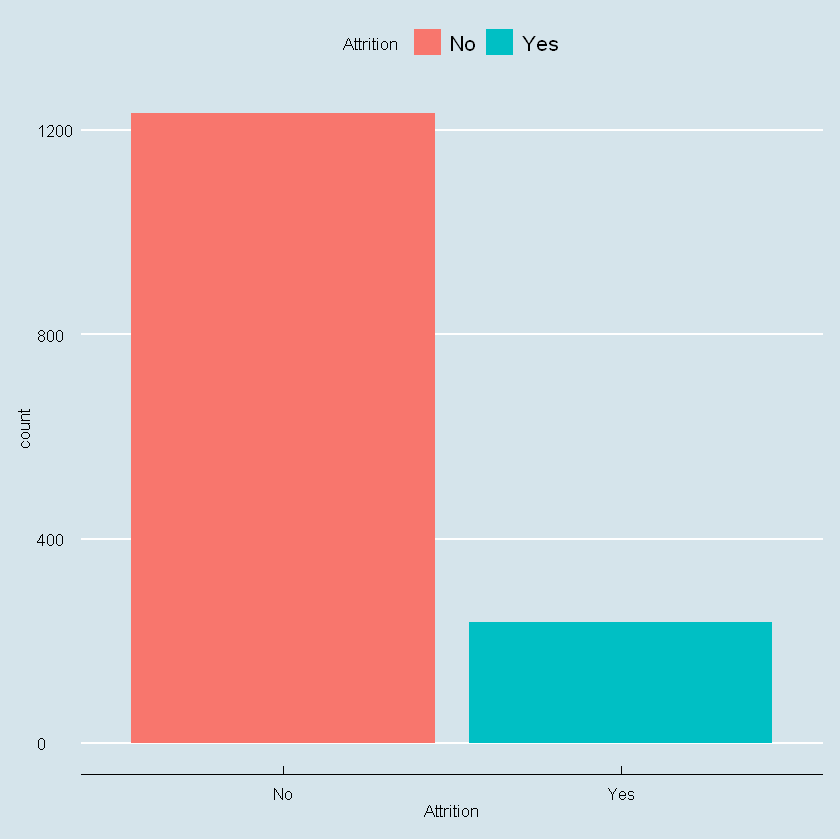

In [9]:
table(att$Attrition)
ggplot(att) +
 aes(x = Attrition, fill = Attrition) +
 geom_bar() +
 scale_fill_hue() +
 ggthemes::theme_economist()

<u>**Insights:**</u>
1. 84% of employees did not quit the organization while 16% did leave the organization.<br>
2. count of 'No' are 5 times more than 'Yes', which means our data is highly imbalance for level 'Yes', this will result in our model fail to predict for level 'Yes' as it will not have sufficient records for training.  

#### 2. Explporatory Data Analysis: 


#### Find out missing values.

In [10]:
colSums(is.na(att))

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

- We can see that dataset does not have any missing values to deal with.

- Let's check how the target variable is distributed amongst its levels.  
Attrition

#### Data Analysis
The goal of EDA is to understand data thoroughly, Understand descriptive statistics related to data, and investigate relationships that may exist between target variable & predictor variables.We also need to investigate relationships between predictor variables since these relationships may result in h compounding effect on the target variable. These insights are also helpful in modelling phase to tune our machine learning model for best results.

#### **Finding Correlation between Age & Attrition**

In [11]:
describeBy(att$Age, att$Attrition)


 Descriptive statistics by group 
group: No
   vars    n  mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 1233 37.56 8.89     36   37.11 8.9  18  60    42 0.41    -0.42 0.25
------------------------------------------------------------ 
group: Yes
   vars   n  mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 237 33.61 9.69     32   32.85 8.9  18  58    40 0.71    -0.11 0.63

Representing above values visually for better intuition

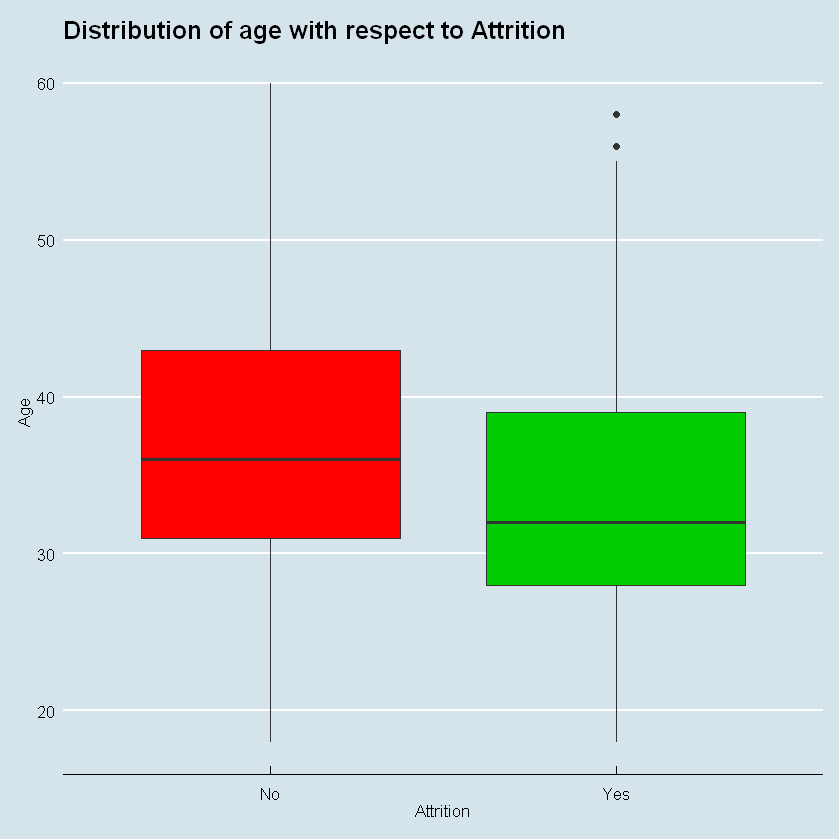

In [12]:
ggplot(data = att, aes(Attrition, Age)) + geom_boxplot(fill = c(2:3)) + ggthemes::theme_economist() + labs(title = "Distribution of age with respect to Attrition")

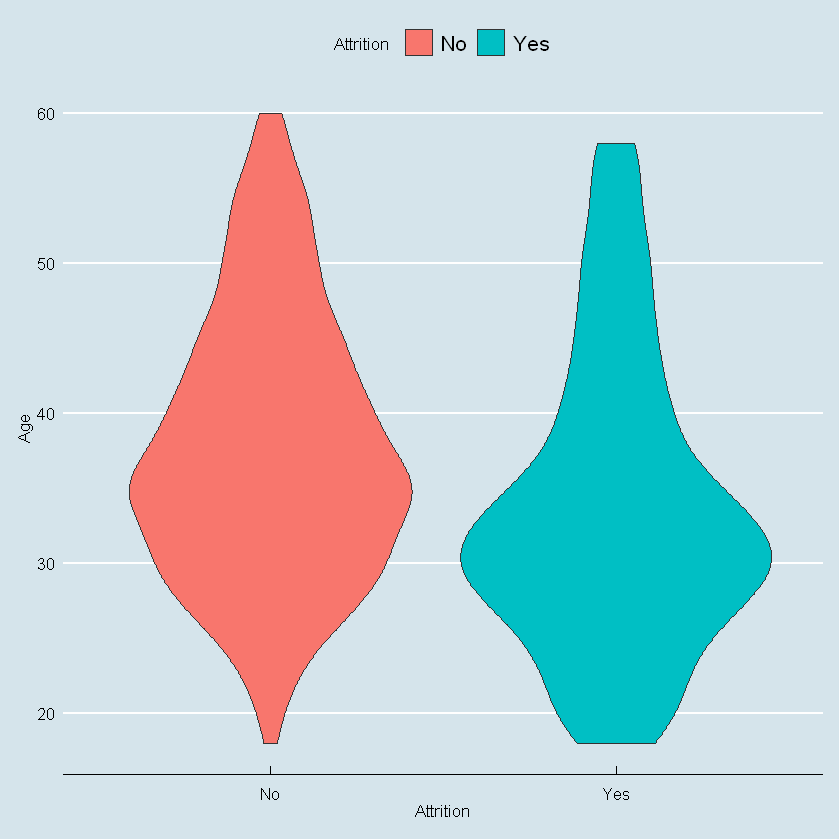

In [13]:
ggplot(att) +
 aes(x = Attrition, y = Age, fill = Attrition) +
 geom_violin(adjust = 1L, scale = "area") +
 scale_fill_hue() +
 ggthemes::theme_economist()

<u>**Insights: **</u><br>
1. From both the plots we can deduce that people with higher age are likely to stay in the company.<br>
2. We can see lot of points concentrated around age 30 for level Yes, from this, we can say that people in the range of 28-32 are most likely to look for new job.<br>
3. This may be because of several factors namely, risk friendly attitude, less/no family dependencies, better pay etc.. we'll explore some of these factors later in our analysis.

In [14]:
hetcor(att$Age, att$Attrition)


Two-Step Estimates

Correlations/Type of Correlation:
              att$Age att.Attrition
att$Age             1    Polyserial
att.Attrition  -0.238             1

Standard Errors:
      att$Age att.Attrition 
                    0.03756 
Levels:  0.03756

n = 1470 

P-values for Tests of Bivariate Normality:
      att$Age att.Attrition 
                  0.0002863 
Levels:  0.0002863

We can see the there is negative correlation between Age and Attrition, which further solidifies our hypothesis, as the age increases, attrition decreases.

##### <u>**Gender Analysis**</u>

**What is Age distribution by gender?**<br>


 Descriptive statistics by group 
group: Female
   vars   n  mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 588 37.33 9.27     36   36.93 8.9  18  60    42 0.37    -0.46 0.38
------------------------------------------------------------ 
group: Male
   vars   n  mean   sd median trimmed mad min max range skew kurtosis  se
X1    1 882 36.65 9.04     35   36.18 8.9  18  60    42 0.44    -0.38 0.3

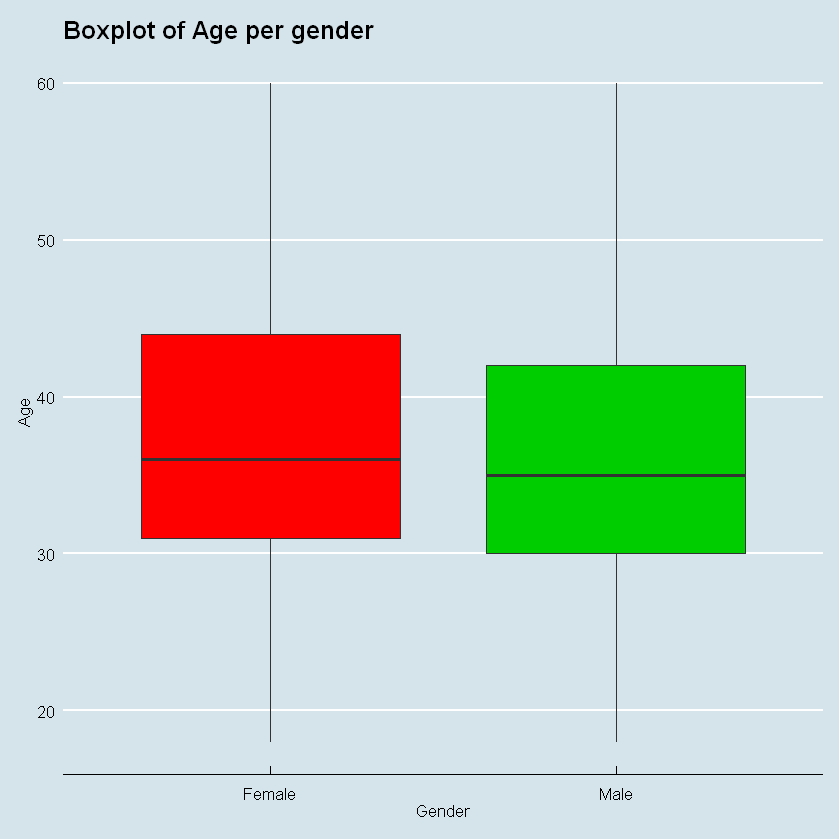

In [15]:
describeBy(att$Age, att$Gender)
ggplot(data = att, aes(Gender, Age)) + geom_boxplot(fill = c(2:3)) + ggtitle("Boxplot of Age per gender") + ggthemes::theme_economist()

<br><br><u>**Insights: **<br></u>
As we can see that mean & median age values for both the genders are very close to each other, which means we can say that age is normally distributed.

<br>**Does job satisfaction hamper attrition by Gender?**<br>


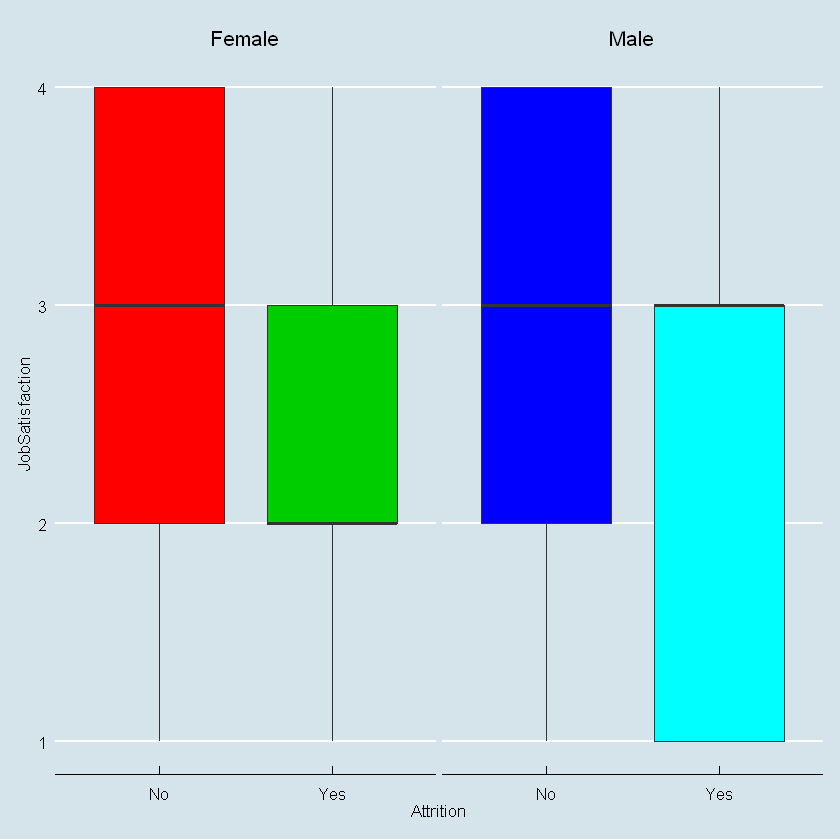

In [16]:
ggplot(data = att, aes(x=Attrition, y=JobSatisfaction)) + geom_boxplot(fill = c(2:5)) + ggthemes::theme_economist() + facet_wrap(~Gender)


<br><br><u>**Insights: **<br></u>
1. Clearly for people who left, job satisfaction levels are lower than people who stayed in company.Which means job satisfaction level is an important indicator for employee attrition.<br>
2. Job satisfaction in females is generally higher than in Males.<br><br>



**Gender bias in salaries is not a sign of good company culture, let's check if it is there in our dataset.**<br>


In [17]:
describeBy(att$MonthlyIncome, att$Gender)



 Descriptive statistics by group 
group: Female
   vars   n    mean      sd median trimmed     mad  min   max range skew
X1    1 588 6686.57 4695.61 5081.5 5918.12 3401.83 1129 19973 18844 1.26
   kurtosis     se
X1     0.65 193.64
------------------------------------------------------------ 
group: Male
   vars   n    mean      sd median trimmed     mad  min   max range skew
X1    1 882 6380.51 4714.86 4837.5 5506.37 3178.69 1009 19999 18990 1.44
   kurtosis     se
X1     1.23 158.76

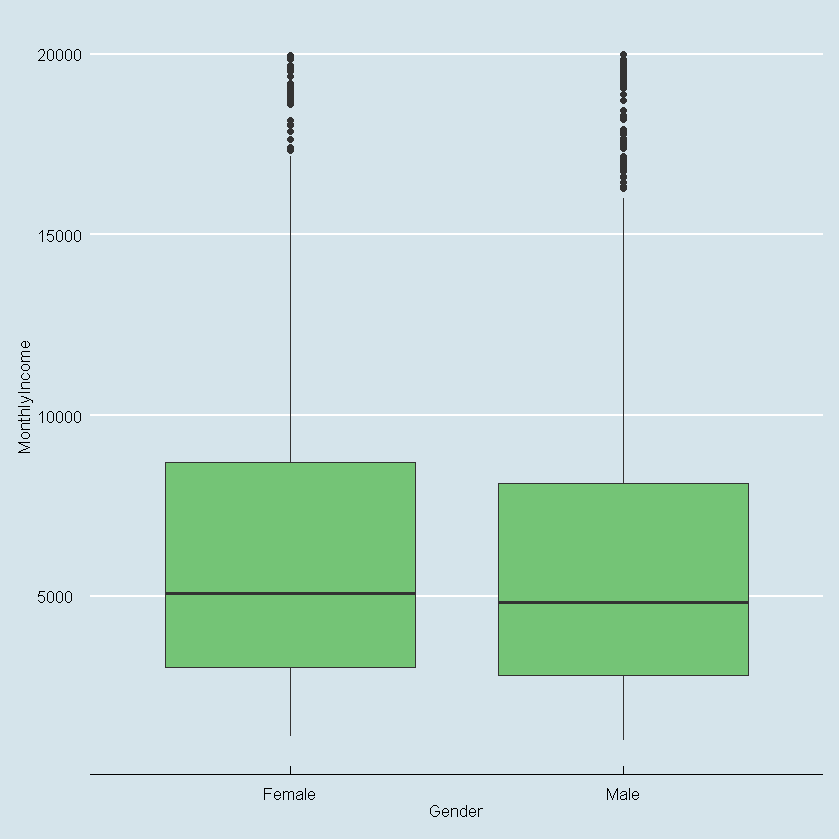

In [18]:
ggplot(att) + aes(x = Gender, y = MonthlyIncome) + geom_boxplot(fill = "#74c476") + ggthemes::theme_economist()


<br><br><u>**Insights: **<br></u>
We can see that salary is distribution for genders is almost same, which means we do not have gender bias in the data, which is good.<br><br>

##### <u>**Education Vs Attrition correlation**</u>
<br> We will need to convert Education to factor since there only 5 types of values in Education ranging from 1 to 5 .<br>


In [19]:
att$Education <- as.factor(att$Education)
levels(att$Education)

[1] "1" "2" "3" "4" "5"

<br>Here,
1 - least educated, maybe non-graduate.

2 - Graduate with non-professional degree, BA, Bcom

3 - Graduate with Professional degree - Btech, BE

4 - Masters Degree

5 - Phd.

<br>Let's check realtionship between education and attrition using cross tabulation.<br>


In [20]:
print(ctable(x = att$Attrition, y = att$Education, prop = 'c', round.digits = 0), method = 'render')

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **<br></u>
1. Highest Attrition is seen in education level-1 = 18%, from this we can say that people with relatively lower education are more prone to attrition.<br>
2. Also, we can see that for education level 3, we see 2nd highest attrition percentage 17%, since this might be due people in this category being freshers/lesser work experience looking for better paying opportunities.<br><br><br>

##### <u>**Impact of income on Attrition**</u><br>

In [21]:
describeBy(att$MonthlyIncome, att$Attrition)


 Descriptive statistics by group 
group: No
   vars    n    mean      sd median trimmed     mad  min   max range skew
X1    1 1233 6832.74 4818.21   5204 6017.45 3458.91 1051 19999 18948 1.28
   kurtosis     se
X1     0.66 137.22
------------------------------------------------------------ 
group: Yes
   vars   n    mean      sd median trimmed     mad  min   max range skew
X1    1 237 4787.09 3640.21   3202 4163.02 1672.37 1009 19859 18850  1.9
   kurtosis     se
X1     4.01 236.46

<br>Observe that mean and median values for both the attrition levels, mean and median income for Attrition level Yes in less by 2000 units than Attrition level - No.<br>


Let's check by visualizing income values for each attrition level<br>


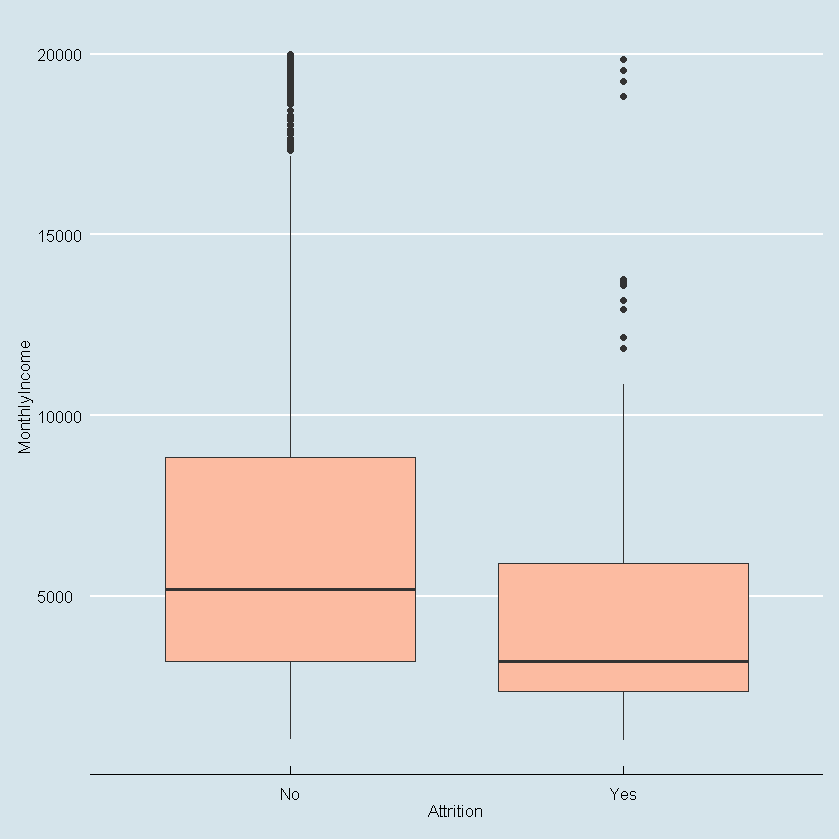

In [22]:
ggplot(att) +
  aes(x = Attrition, y = MonthlyIncome) +
  geom_boxplot(fill = "#fcbba1") +
  ggthemes::theme_economist()

<br><br><u>**Insights: **<br></u>
1. This confirms that people with lower income than their peers are more prone to attrition<br>

We should also check for relation between income and department, this can help us to understand better about resons for attrition
Department & Income relation<br>

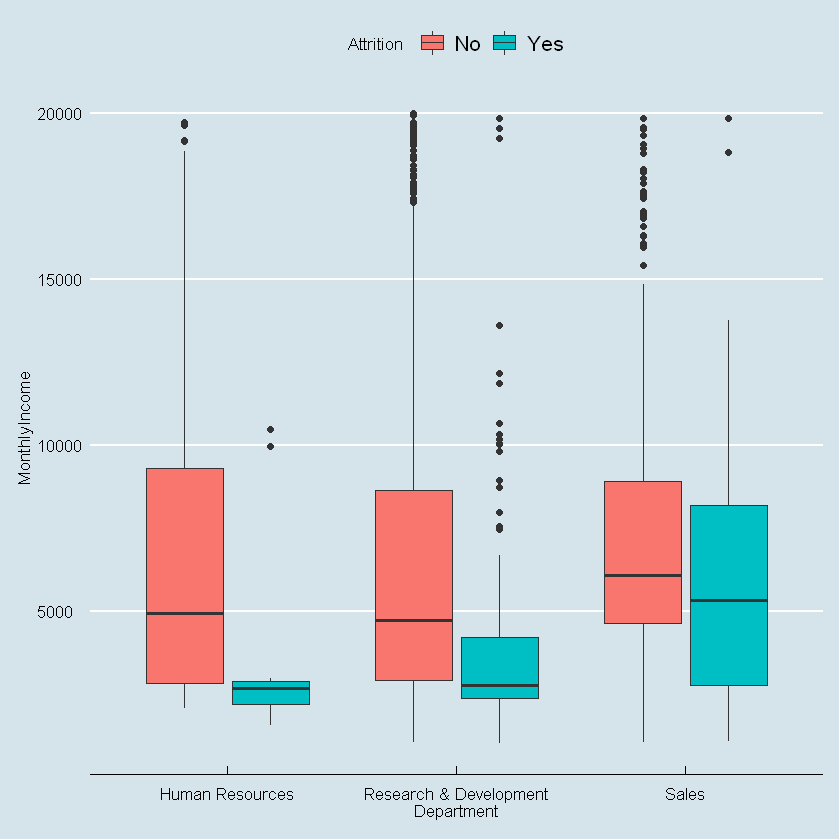

In [23]:
ggplot(att) +
  aes(x = Department, y = MonthlyIncome, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()

<br><br><u>**Insights: **<br></u>
1. Out of the 3 departments, for Attrition level Yes - HR is lowest paid, followed by R&D<br>
2. Median income for Attrition - yes employee is far less that for Attrition - No employee in same department, hence employees with these salaries will look for better paying opportunities.<br><br><br>


##### <u>**Impact of Job Satisfaction & Job role on Attrition**</u>


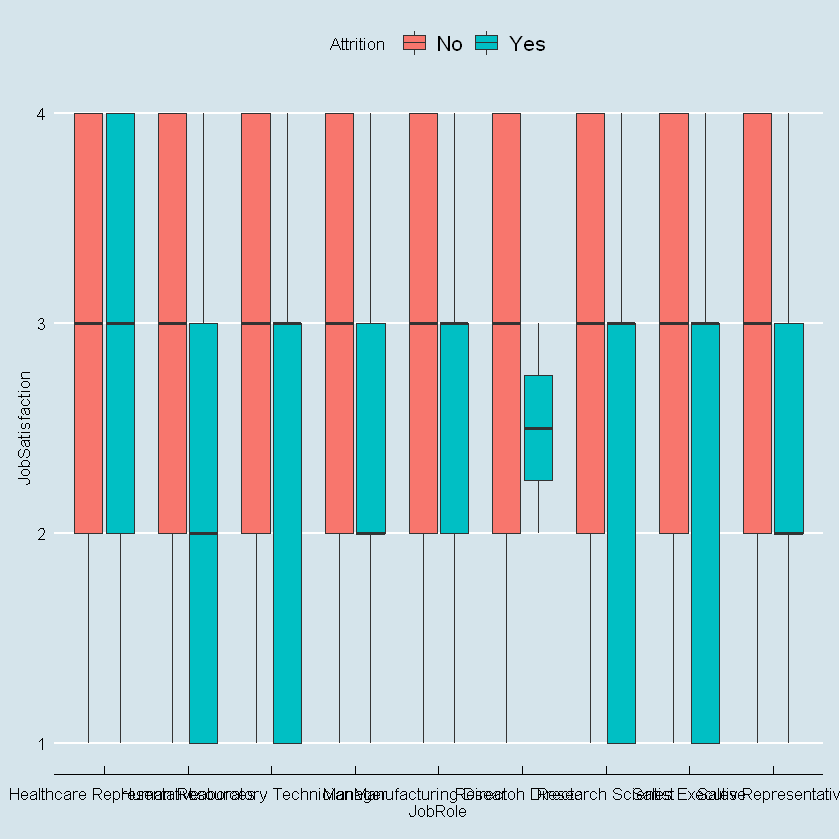

In [24]:
ggplot(att) +
  aes(x = JobRole, y = JobSatisfaction, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()

<br><br><u>**Insights: **<br></u>
1. Except Healthcare representative role, for attrition level yes, all the job roles have lower job satisfaction. This explains that job satisfaction is an important indicator for understanding attrition in company.<br>
2. Also job satisfaction can be low due to lower salaries also.<br><br><br>


##### <u>**Relation between job role and Attrition** </u>
<br> Creating a cross table to understand relation between job role and attrition: 


In [25]:
print(ctable(x = att$Attrition, y = att$JobRole, prop = 'c', round.digits = 0), method = 'render')


Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **<br></u>
1. Highest Attrition can be seen in sales representative job role, this can attributed to lower education and lower salary for sales representatives.<br>
2. Surprisingly HR people even though having lowest salary have 3rd highest attrition percentage - 23%<br>
3. Lower designation tend to have higher attrition percentage than people with higher designations.<br>
  
  
- Since, Sales Represetatives have very high attrition rates compared to other job roles, let's drill down to find more details regarding this<br><br>

Warning message in grDevices::png(..., res = dpi, units = "in"):
"unable to open file 'C:/Pratik/Imarticus_Datascience_Prodegree/Imarticus_Project_1/AttVsJobRole' for writing"Warning message in grDevices::png(..., res = dpi, units = "in"):
"opening device failed"

ERROR: Error in grDevices::png(..., res = dpi, units = "in"): unable to start png() device


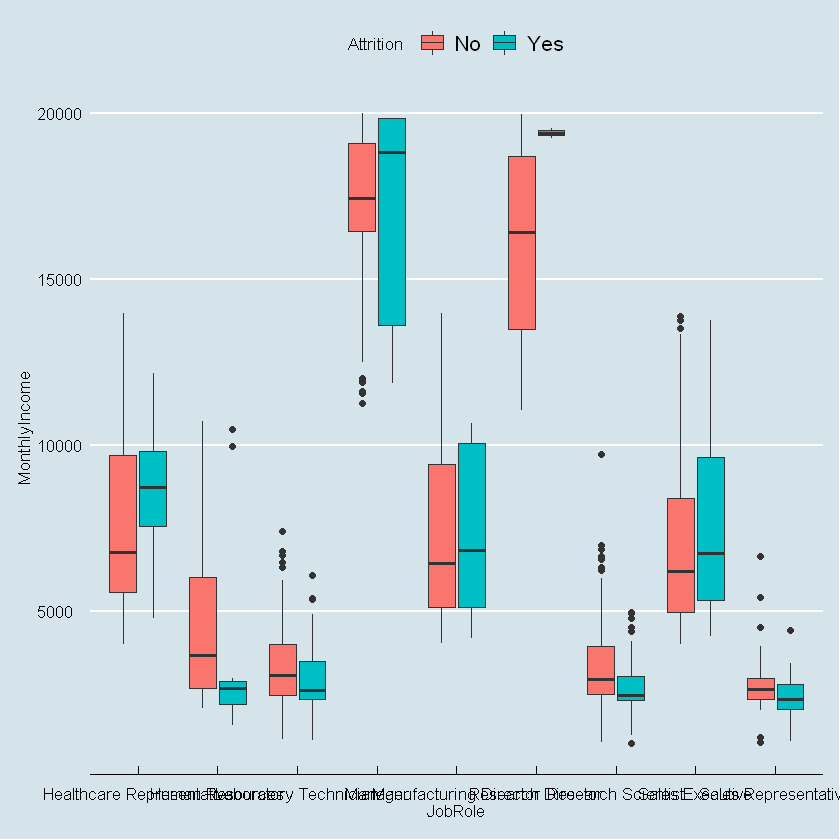

In [26]:
ggplot(att) +
  aes(x = JobRole, y = MonthlyIncome, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()
ggsave(filename = 'AttVsJobRole', plot = last_plot(), device = 'png', path = "C:/Pratik/Imarticus_Datascience_Prodegree/Imarticus_Project_1", scale = 1, width = 18, height = 7)

<br>
- Indicator 1: Income of sales representatives is very low, age can be impacting factor on this <br><br>

In [ ]:
ggplot(att) +
  aes(x = JobRole, y = Age, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()
ggsave(filename = 'AttVsAge', plot = last_plot(), device = 'png', path = "C:/Pratik/Imarticus_Datascience_Prodegree/Imarticus_Project_1", scale = 1, width = 18, height = 7)

<br>
- Indicator 2: Age group of Sales representatives is also least, which explains why there is high attrition in sales representatives.<br><br>


##### <u>**Exploring relation between Job Satisfaction and Income**</u>
Let's check how job satisfaction income are related with respect to Attrition.<br>
Converting job satisfaction to factor

In [27]:
att$JobSatisfaction <- as.factor(att$JobSatisfaction)
levels(att$JobSatisfaction)     # Four Levels - 1 - least job satisfaction and 4- most job satisfaction

[1] "1" "2" "3" "4"

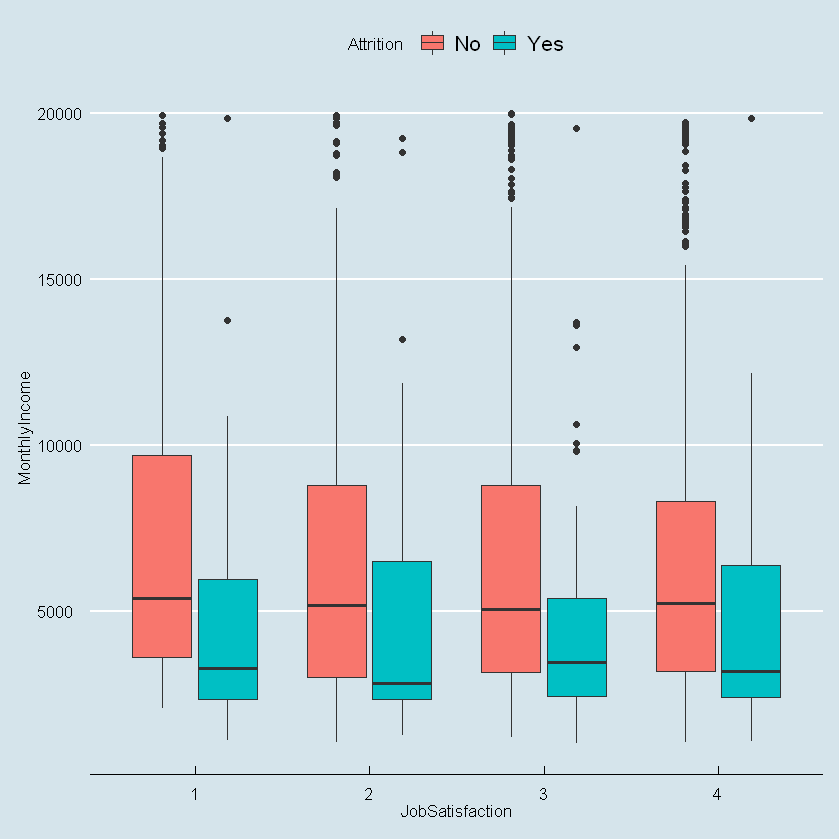

In [28]:
ggplot(att) +
  aes(x = JobSatisfaction, y = MonthlyIncome, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()

<br><br><u>**Insights: **<br></u>
1. people with lower job satisfaction have lower monthly income, and hence we can say that income can be an indicator of lower job satisfaction<br>
2. Clearly people are leaving jobs due to lower salaries which also leads to lower job satisfaction.<br><br><br>

##### <u>**Impact of Overtime on Attrition**</u>

In [29]:
print(ctable(x = att$Attrition, y = att$OverTime, prop = 'r', round.digits = 0), method = 'render')

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **</u><br>
1. This clearly explains that more than half (54%) of the people who left organization left because of overtime


##### <u>**Impact of Working environment on Attrition**</u>

Working environment by job role


In [30]:
describeBy(att$EnvironmentSatisfaction, att$Attrition)


 Descriptive statistics by group 
group: No
   vars    n mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1233 2.77 1.07      3    2.84 1.48   1   4     3 -0.38    -1.12 0.03
------------------------------------------------------------ 
group: Yes
   vars   n mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 237 2.46 1.17      3    2.46 1.48   1   4     3 -0.01    -1.49 0.08

<br><br><u>**Insights: **</u><br>
1. Environment Satistisfaction does not seem to be making anu substantial impact on Attrition.<br><br>


##### <u>**Impact of Distance from home on Attrition**</u>


In [31]:
describeBy(att$DistanceFromHome, att$Attrition)



 Descriptive statistics by group 
group: No
   vars    n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 1233 8.92 8.01      7    7.75 7.41   1  29    28 1.03    -0.05 0.23
------------------------------------------------------------ 
group: Yes
   vars   n  mean   sd median trimmed   mad min max range skew kurtosis   se
X1    1 237 10.63 8.45      9     9.9 10.38   1  29    28 0.63    -0.89 0.55

Visualizing these 2 variables

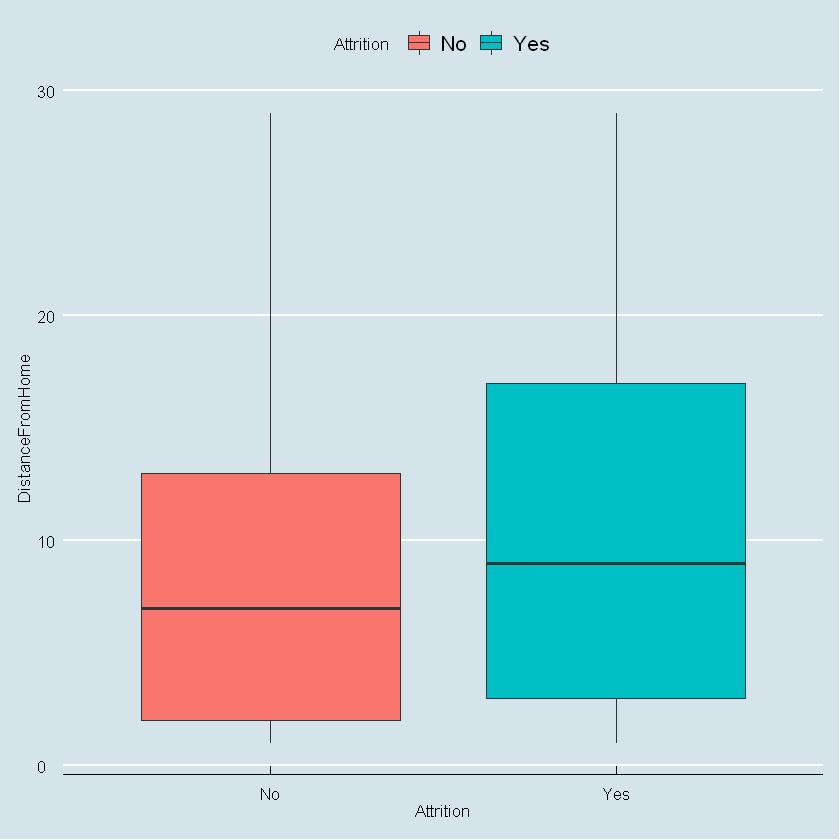

In [32]:
ggplot(att) +
  aes(x = Attrition, y = DistanceFromHome, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()

<br><br><u>**Insights: **</u><br>
1. We can see that people leaving far (>10km) are more prone to attrition, as leaving may take a toll on health.


##### <u>**Marital Status & Attrition Relation**</u>

In [33]:
print(ctable(x = att$Attrition, y = att$MaritalStatus, prop = 'c', totals = T, round.digits = 0), method = 'render')

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

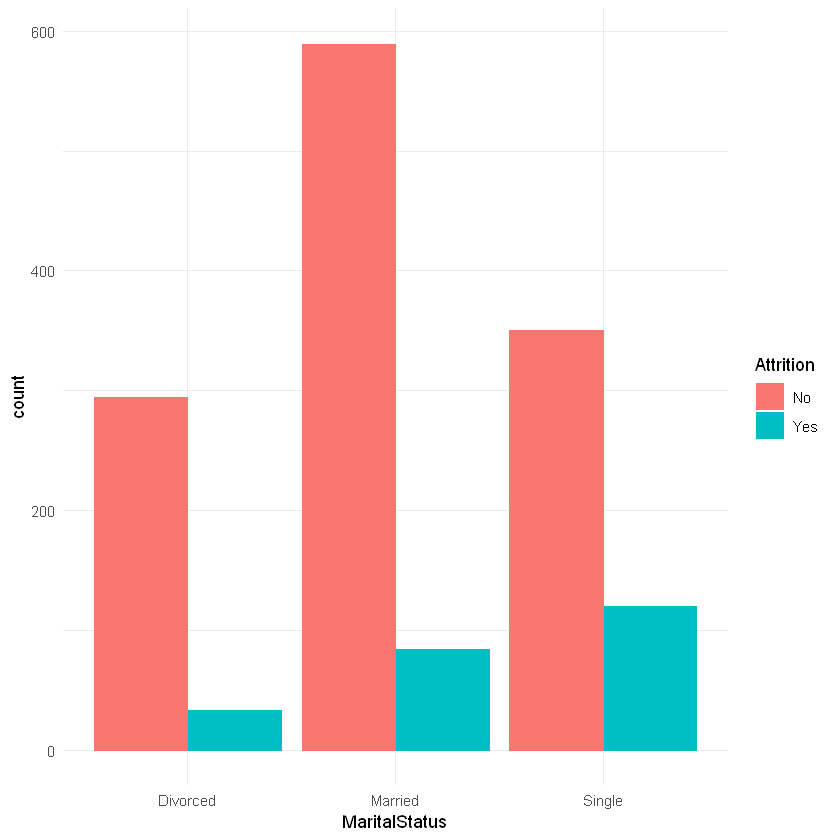

In [34]:
ggplot(att) +
  aes(x = MaritalStatus, fill = Attrition, colour = Attrition) +
  geom_bar(position = "dodge") +
  scale_fill_hue() +
  scale_color_hue() +
  theme_minimal()

<br><br><u>**Insights: **</u><br>
1. Single people tend to likely hop companies as against married.<br>
2. divorced people are less likely to leave company<br>


##### <u>**Job Involvement & Attrition Relation**</u>


In [35]:
att$JobInvolvement <- as.factor(att$JobInvolvement)
print(ctable(x = att$Attrition, y = att$JobInvolvement, prop = 'c', round.digits = 0), method = 'render')

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **</u><br>
1. people with job involvement < 3 are 42% in Attrition level Yes
2. This means that people who have less job involvement, will tend to leave company.

##### <u>**Relation between Job level and Attrition**</u>

In [36]:
describeBy(att$JobLevel, att$Attrition)



 Descriptive statistics by group 
group: No
   vars    n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 1233 2.15 1.12      2    1.99 1.48   1   5     4 0.95     0.23 0.03
------------------------------------------------------------ 
group: Yes
   vars   n mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 237 1.64 0.94      1    1.47   0   1   5     4 1.53     2.01 0.06

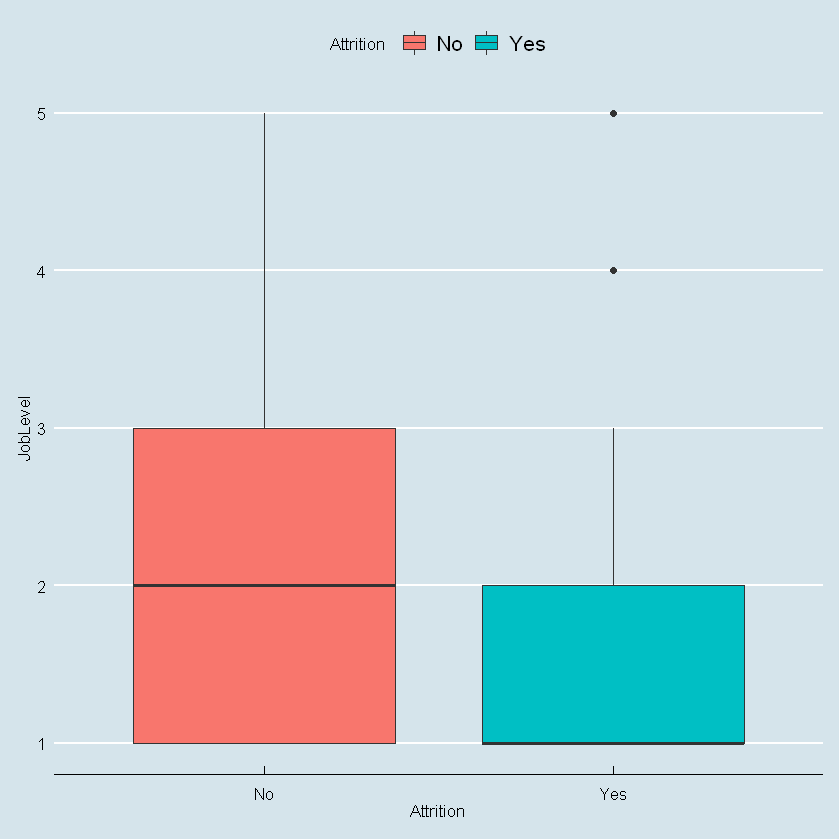

In [37]:
ggplot(att) +
  aes(x = Attrition, y = JobLevel, fill = Attrition) +
  geom_boxplot() +
  scale_fill_hue() +
  ggthemes::theme_economist()

<br><br><u>**Insights: **</u><br>
1. people with lower job level tend to switch companies faster.


##### <u>**Number of Companies worked against attrition**</u>


In [38]:
describeBy(att$NumCompaniesWorked, att$Attrition)



 Descriptive statistics by group 
group: No
   vars    n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 1233 2.65 2.46      2    2.31 1.48   0   9     9 1.06     0.13 0.07
------------------------------------------------------------ 
group: Yes
   vars   n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 237 2.94 2.68      1    2.65 1.48   0   9     9 0.85    -0.58 0.17

In [39]:
att$NumCompaniesWorked <- as.factor(att$NumCompaniesWorked)
print(ctable(x = att$Attrition, y = att$NumCompaniesWorked, prop = 'c', round.digits = 0), method = 'render')

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **</u><br>
1. This table clearly explains that people with record higher companies worked, will tend to switch companies again


##### <u>**Exploring relation between % salary hike, performance rating & Attrition**</u>
<br>

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


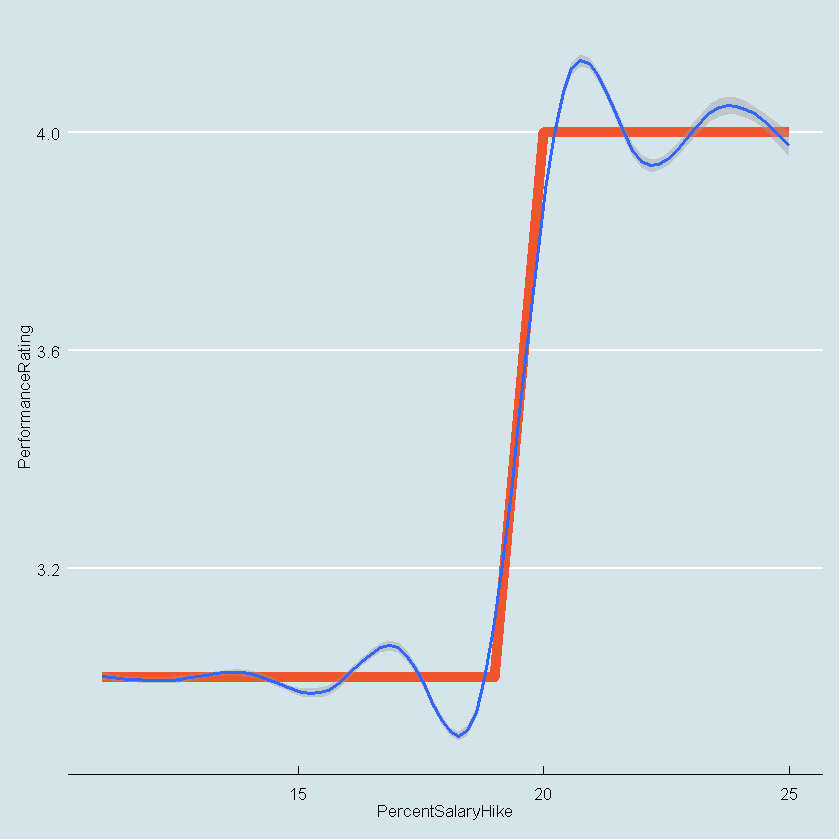

In [40]:
ggplot(att) +
  aes(x = PercentSalaryHike, y = PerformanceRating) +
  geom_line(size = 3L, colour = "#ef562d") +
  geom_smooth(span = 1L) +
  ggthemes::theme_economist()

In [41]:
cor(att$PercentSalaryHike, att$PerformanceRating)


[1] 0.77355

1. We can see that performance rating is directly proportional to % salary hike, let's see how these factors further affect Attrition


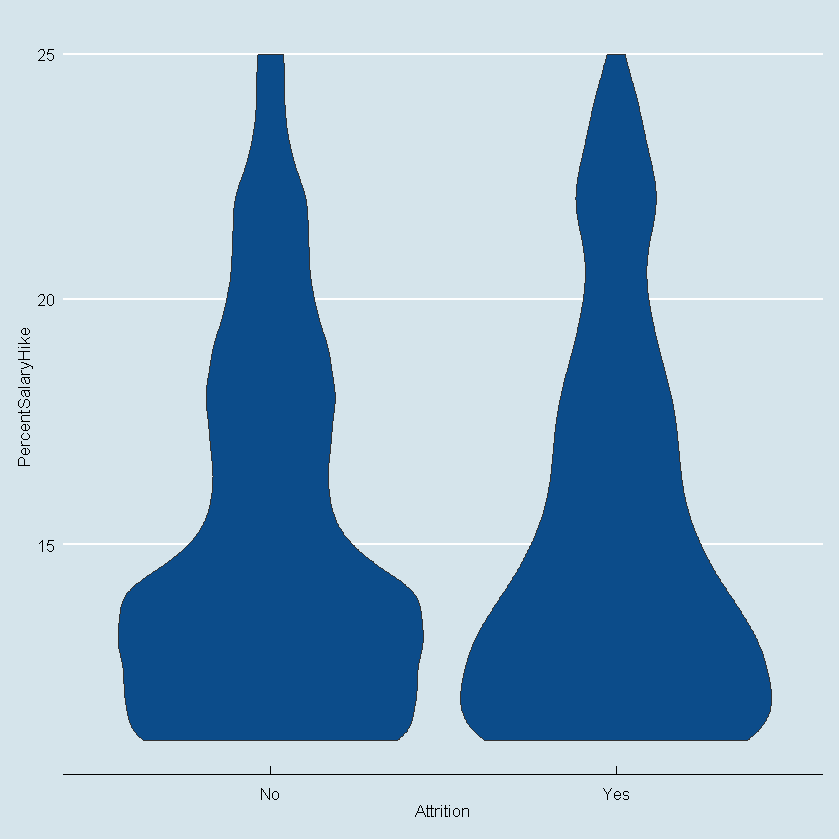

In [42]:
ggplot(att) +
  aes(x = Attrition, y = PercentSalaryHike) +
  geom_violin(adjust = 0.7, scale = "area", fill = "#0c4c8a") +
  ggthemes::theme_economist()

<br><br><u>**Insights: **</u><br>
1. From violin plot &  we come to know that, people with lower % salary hike will look for company change.<br>
<br>

##### <u>**Relationship between stock option level & Attrition **</u>


In [43]:
describeBy(att$StockOptionLevel, att$Attrition)



 Descriptive statistics by group 
group: No
   vars    n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 1233 0.85 0.84      1    0.74 1.48   0   3     3 0.87     0.25 0.02
------------------------------------------------------------ 
group: Yes
   vars   n mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 237 0.53 0.86      0    0.34   0   0   3     3 1.67     1.96 0.06

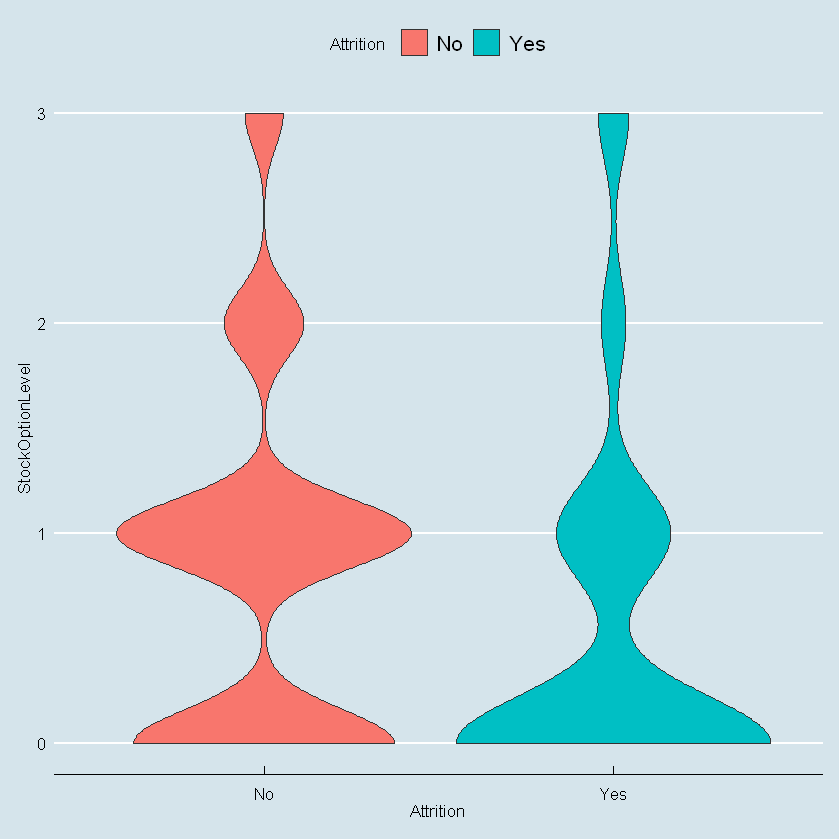

In [44]:
ggplot(att) +
  aes(x = Attrition, y = StockOptionLevel, fill = Attrition) +
  geom_violin(adjust = 1L, scale = "area") +
  scale_fill_hue() +
  ggthemes::theme_economist() +
  theme(legend.position = "top")

In [45]:
att$StockOptionLevel <- as.factor(att$StockOptionLevel)
levels(att$StockOptionLevel)
print(ctable(x = att$Attrition, y = att$StockOptionLevel, prop = 'c', round.digits = 0), method = 'render')

[1] "0" "1" "2" "3"

Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"

Shiny tags cannot be represented in plain text (need html)

<br><br><u>**Insights: **</u><br>
1. In the violin plot, for Attrition level Yes, major chunk of total values are at 0 stock option level & For Attrition - No, major chunk of stock option values is at 1<br>
2. From the violin plot we can see that for Attrition level Yes, values for stock option level 1,2,3 are very less compared to Attrition level No 
3. From the frequency table, Attrition for Stock Option level 0 is highest.<br>
4. But surprisingly, attrition for stock option level 3 is 2nd highest.<br>


##### <u>**Relationship between Total working years & Attrition **</u>


In [46]:
describeBy(att$TotalWorkingYears, att$Attrition)



 Descriptive statistics by group 
group: No
   vars    n  mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 1233 11.86 7.76     10   10.96 5.93   0  38    38 1.06     0.66 0.22
------------------------------------------------------------ 
group: Yes
   vars   n mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 237 8.24 7.17      7    7.14 4.45   0  40    40 1.67     3.62 0.47

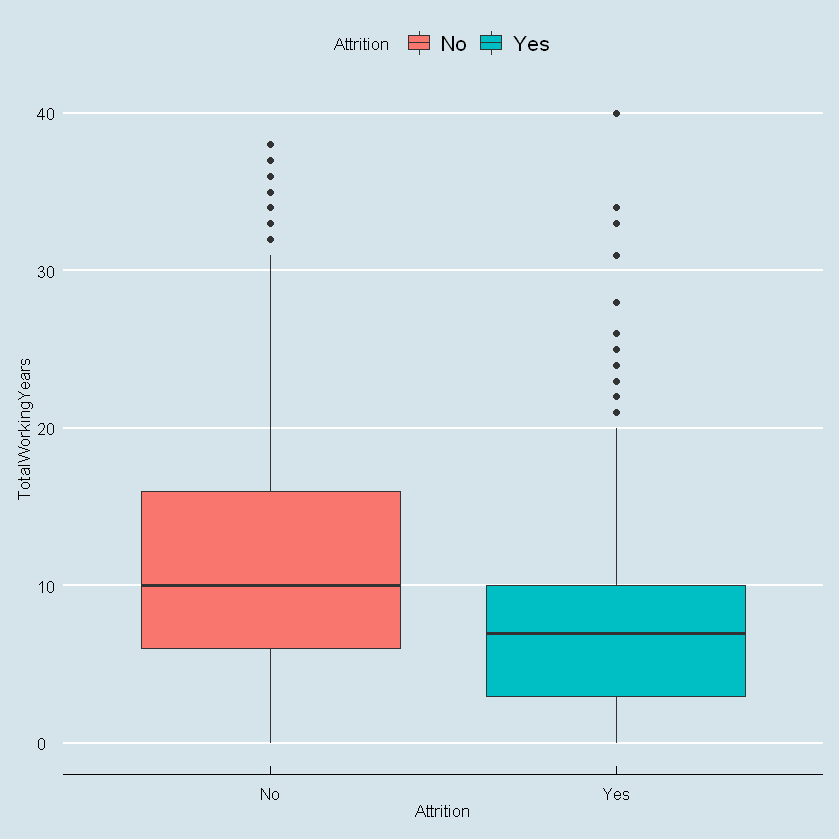

In [47]:
ggplot(att) + aes(x = Attrition, y = TotalWorkingYears, fill = Attrition) + geom_boxplot() +
  scale_fill_hue() + ggthemes::theme_economist()

<br><br><u>**Insights: **</u><br>
1. From above descriptive statistics and Boxplot we can say people with less work experience are more keen on changing company maybe for better monetory or work prospects.
2. Also we can see that people having 10 or more years of experience will tend to stay in company more.<br><br>


#### 3. Feature Engineering
This process helps us to derive new features based on existing features also, we shall select important features using feature selection techniques.<br>


In [48]:
att <- attrition          

<br>
Removing unnecessary columns like Daily Rate, employee number, Hourly rate, Monthly rate, Over18, Standard hours, employee count

In [49]:
 att <- att[ , -c(4, 9, 10, 13, 20, 22, 27)]             #  
colnames(att)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "Department"              
 [5] "DistanceFromHome"         "Education"               
 [7] "EducationField"           "EnvironmentSatisfaction" 
 [9] "Gender"                   "JobInvolvement"          
[11] "JobLevel"                 "JobRole"                 
[13] "JobSatisfaction"          "MaritalStatus"           
[15] "MonthlyIncome"            "NumCompaniesWorked"      
[17] "OverTime"                 "PercentSalaryHike"       
[19] "PerformanceRating"        "RelationshipSatisfaction"
[21] "StockOptionLevel"         "TotalWorkingYears"       
[23] "TrainingTimesLastYear"    "WorkLifeBalance"         
[25] "YearsAtCompany"           "YearsInCurrentRole"      
[27] "YearsSinceLastPromotion"  "YearsWithCurrManager"

In [50]:
head(att)

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,...,3,3,0,8,2,2,7,7,3,6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   7.000   8.000   8.163  10.000  12.000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


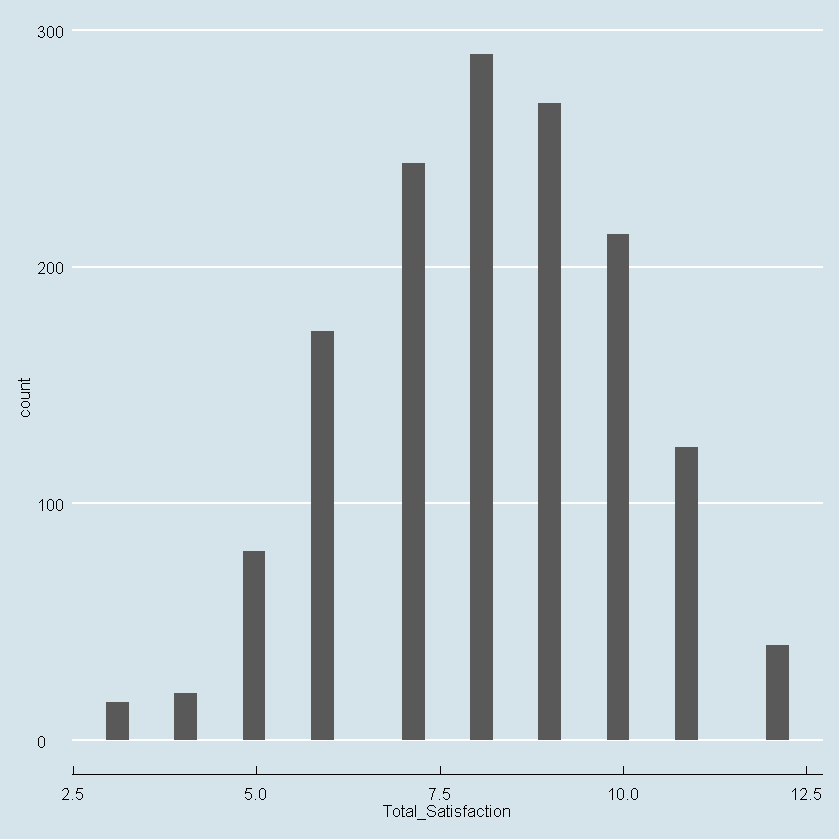

In [51]:
# grouping all satisfaction columns & creating new column of total satisfaction

att$Total_Satisfaction <- att$JobSatisfaction+att$EnvironmentSatisfaction+att$RelationshipSatisfaction
summary(att$Total_Satisfaction)
ggplot(att) + aes(x = Total_Satisfaction) + geom_histogram() + ggthemes::theme_economist()

In [52]:
# Delete job satisfaction, relationship satisfaction & environment satisfaction columns
att <- att[ , -c('JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction')]
colnames(att)

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "Gender"                 
 [9] "JobInvolvement"          "JobLevel"               
[11] "JobRole"                 "MaritalStatus"          
[13] "MonthlyIncome"           "NumCompaniesWorked"     
[15] "OverTime"                "PercentSalaryHike"      
[17] "PerformanceRating"       "StockOptionLevel"       
[19] "TotalWorkingYears"       "TrainingTimesLastYear"  
[21] "WorkLifeBalance"         "YearsAtCompany"         
[23] "YearsInCurrentRole"      "YearsSinceLastPromotion"
[25] "YearsWithCurrManager"    "Total_Satisfaction"

In [53]:
# Let's convert categorical columns into numeric columns
# Converting target variable into 0 and 1
att <- mutate(att, Attrition = ifelse(Attrition == 'Yes', 1, 0))
att <- att %>% mutate_if(is.factor, as.numeric)
summary(att)
colnames(att)

      Age          Attrition      BusinessTravel    Department   
 Min.   :18.00   Min.   :0.0000   Min.   :1.000   Min.   :1.000  
 1st Qu.:30.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:2.000  
 Median :36.00   Median :0.0000   Median :3.000   Median :2.000  
 Mean   :36.92   Mean   :0.1612   Mean   :2.607   Mean   :2.261  
 3rd Qu.:43.00   3rd Qu.:0.0000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :60.00   Max.   :1.0000   Max.   :3.000   Max.   :3.000  
 DistanceFromHome   Education     EducationField      Gender    JobInvolvement
 Min.   : 1.000   Min.   :1.000   Min.   :1.000   Min.   :1.0   Min.   :1.00  
 1st Qu.: 2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1.0   1st Qu.:2.00  
 Median : 7.000   Median :3.000   Median :3.000   Median :2.0   Median :3.00  
 Mean   : 9.193   Mean   :2.913   Mean   :3.248   Mean   :1.6   Mean   :2.73  
 3rd Qu.:14.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:2.0   3rd Qu.:3.00  
 Max.   :29.000   Max.   :5.000   Max.   :6.000   Max.   :2.0   

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "Gender"                 
 [9] "JobInvolvement"          "JobLevel"               
[11] "JobRole"                 "MaritalStatus"          
[13] "MonthlyIncome"           "NumCompaniesWorked"     
[15] "OverTime"                "PercentSalaryHike"      
[17] "PerformanceRating"       "StockOptionLevel"       
[19] "TotalWorkingYears"       "TrainingTimesLastYear"  
[21] "WorkLifeBalance"         "YearsAtCompany"         
[23] "YearsInCurrentRole"      "YearsSinceLastPromotion"
[25] "YearsWithCurrManager"    "Total_Satisfaction"

#### 4. Feature Selection & Feature Importance


In [54]:
# Here we are use Boruta for feature selection

imp_ft <- Boruta(Attrition ~. , data = att, maxRuns = 500, doTrace=1)
imp_ft$finalDecision

After 12 iterations, +7.2 secs: 
 confirmed 12 attributes: Age, JobLevel, JobRole, MaritalStatus, MonthlyIncome and 7 more;
 rejected 6 attributes: Education, EducationField, Gender, PercentSalaryHike, PerformanceRating and 1 more;
 still have 7 attributes left.

After 19 iterations, +11 secs: 
 confirmed 1 attribute: NumCompaniesWorked;
 still have 6 attributes left.

After 23 iterations, +13 secs: 
 confirmed 1 attribute: WorkLifeBalance;
 still have 5 attributes left.

After 29 iterations, +16 secs: 
 confirmed 1 attribute: JobInvolvement;
 still have 4 attributes left.

After 54 iterations, +29 secs: 
 rejected 1 attribute: BusinessTravel;
 still have 3 attributes left.

After 56 iterations, +30 secs: 
 confirmed 1 attribute: YearsSinceLastPromotion;
 still have 2 attributes left.

After 295 iterations, +2.5 mins: 
 confirmed 1 attribute: Department;
 still have 1 attribute left.



Age          BusinessTravel              Department 
              Confirmed                Rejected               Confirmed 
       DistanceFromHome               Education          EducationField 
              Tentative                Rejected                Rejected 
                 Gender          JobInvolvement                JobLevel 
               Rejected               Confirmed               Confirmed 
                JobRole           MaritalStatus           MonthlyIncome 
              Confirmed               Confirmed               Confirmed 
     NumCompaniesWorked                OverTime       PercentSalaryHike 
              Confirmed               Confirmed                Rejected 
      PerformanceRating        StockOptionLevel       TotalWorkingYears 
               Rejected               Confirmed               Confirmed 
  TrainingTimesLastYear         WorkLifeBalance          YearsAtCompany 
               Rejected               Confirmed               Confirmed 
     YearsInCurrentRole YearsSinceLastPromotion    YearsWithCurrManager 
              Confirmed               Confirmed               Confirmed 
     Total_Satisfaction 
              Confirmed 
Levels: Tentative Confirmed Rejected

In [55]:
# Check the count of each Tentative,Confirmed,Rejected features

length(imp_ft$finalDecision[imp_ft$finalDecision == "Tentative"])
length(imp_ft$finalDecision[imp_ft$finalDecision == "Confirmed"])
length(imp_ft$finalDecision[imp_ft$finalDecision == "Rejected"])

[1] 1

[1] 17

[1] 7

In [56]:
# Check which are confirmed features

imp_ft$finalDecision[imp_ft$finalDecision == 'Confirmed']
colnames(att)

Age              Department          JobInvolvement 
              Confirmed               Confirmed               Confirmed 
               JobLevel                 JobRole           MaritalStatus 
              Confirmed               Confirmed               Confirmed 
          MonthlyIncome      NumCompaniesWorked                OverTime 
              Confirmed               Confirmed               Confirmed 
       StockOptionLevel       TotalWorkingYears         WorkLifeBalance 
              Confirmed               Confirmed               Confirmed 
         YearsAtCompany      YearsInCurrentRole YearsSinceLastPromotion 
              Confirmed               Confirmed               Confirmed 
   YearsWithCurrManager      Total_Satisfaction 
              Confirmed               Confirmed 
Levels: Tentative Confirmed Rejected

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "Gender"                 
 [9] "JobInvolvement"          "JobLevel"               
[11] "JobRole"                 "MaritalStatus"          
[13] "MonthlyIncome"           "NumCompaniesWorked"     
[15] "OverTime"                "PercentSalaryHike"      
[17] "PerformanceRating"       "StockOptionLevel"       
[19] "TotalWorkingYears"       "TrainingTimesLastYear"  
[21] "WorkLifeBalance"         "YearsAtCompany"         
[23] "YearsInCurrentRole"      "YearsSinceLastPromotion"
[25] "YearsWithCurrManager"    "Total_Satisfaction"

### Model Building:

#### 1. Logistic Regression

In [57]:
# Sampling
set.seed(123)
att_sample <- sample(2, nrow(att), replace = T, prob = c(0.8,0.2))
att_train <- att[att_sample == 1, ]
att_test <- att[att_sample == 2, ]

In [58]:
# We can see that there is heavy class imbalance
table(att_train$Attrition)


  0   1 
995 191 

In [59]:
#Removing Class Imbalance

att_train_os <- ovun.sample(Attrition ~., data = att_train, method = 'over')$data
table(att_train_os$Attrition)



  0   1 
995 993 

In [60]:
att_logreg <- glm(Attrition ~ . , data = att_train_os, family = binomial)
summary(att_logreg)


Call:
glm(formula = Attrition ~ ., family = binomial, data = att_train_os)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.68370  -0.69464  -0.02688   0.73036   2.77672  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.409e+00  9.605e-01   1.467 0.142380    
Age                     -2.597e-02  8.732e-03  -2.974 0.002939 ** 
BusinessTravel          -2.116e-02  9.568e-02  -0.221 0.824961    
Department               9.681e-01  1.759e-01   5.504 3.70e-08 ***
DistanceFromHome         3.603e-02  7.417e-03   4.857 1.19e-06 ***
Education               -3.064e-03  5.956e-02  -0.051 0.958971    
EducationField           7.679e-02  4.484e-02   1.713 0.086786 .  
Gender                   2.457e-01  1.240e-01   1.981 0.047605 *  
JobInvolvement          -6.316e-01  8.767e-02  -7.205 5.82e-13 ***
JobLevel                -4.110e-01  1.971e-01  -2.085 0.037025 *  
JobRole                 -1.022e-01  3.622e-02  -

In [61]:
# Predict the model And plot Confusion matrix

pred_logreg <- predict(att_logreg, att_test, type = 'response')
df_logreg <- data.frame(pred_logreg, att_test$Attrition)
colnames(df_logreg) <- c('Predicted', 'Actual')
df_logreg <- mutate(df_logreg, Predicted = ifelse(Predicted > 0.5, 1, 0))
cm <- table(df_logreg$Predicted, df_logreg$Actual)
confusionMatrix(cm)  # Final Model for Logistic Regression

Confusion Matrix and Statistics

   
      0   1
  0 177  16
  1  61  30
                                          
               Accuracy : 0.7289          
                 95% CI : (0.6732, 0.7797)
    No Information Rate : 0.838           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2839          
                                          
 Mcnemar's Test P-Value : 5.324e-07       
                                          
            Sensitivity : 0.7437          
            Specificity : 0.6522          
         Pos Pred Value : 0.9171          
         Neg Pred Value : 0.3297          
             Prevalence : 0.8380          
         Detection Rate : 0.6232          
   Detection Prevalence : 0.6796          
      Balanced Accuracy : 0.6979          
                                          
       'Positive' Class : 0               
                                          

Area under the curve (AUC): 0.750

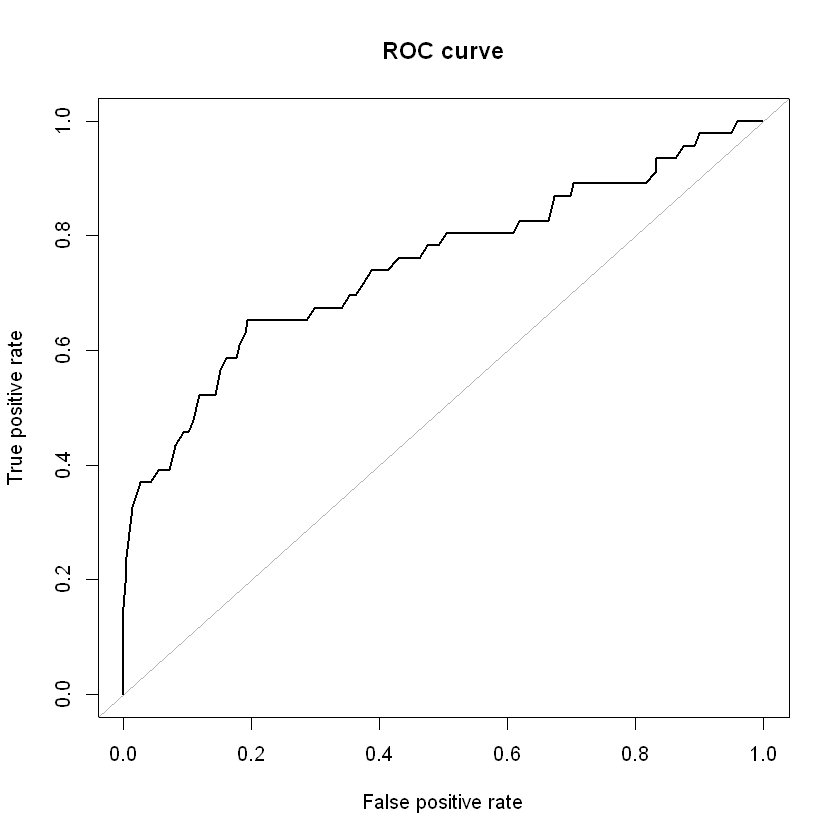

In [62]:
# Plotting of AUROC
roc.curve(df_logreg$Actual, pred_logreg)

#### 2. Logistic Regression using Boruta Feature Selection technique and using Caret package


In [63]:
colnames(att)

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "Gender"                 
 [9] "JobInvolvement"          "JobLevel"               
[11] "JobRole"                 "MaritalStatus"          
[13] "MonthlyIncome"           "NumCompaniesWorked"     
[15] "OverTime"                "PercentSalaryHike"      
[17] "PerformanceRating"       "StockOptionLevel"       
[19] "TotalWorkingYears"       "TrainingTimesLastYear"  
[21] "WorkLifeBalance"         "YearsAtCompany"         
[23] "YearsInCurrentRole"      "YearsSinceLastPromotion"
[25] "YearsWithCurrManager"    "Total_Satisfaction"

In [64]:
# Here we are use the features which we are got confirmed in baruta feature selection

att_imp <- att[ , c(1,4,5,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26)]

In [65]:
# Add the target variable & Converting to biary

att_imp$Attrition <- attrition$Attrition
att_imp <- mutate(att_imp, Attrition = ifelse(Attrition == 'Yes', 1, 0))

In [66]:
# Sampling
set.seed(123)
att_sample <- sample(2, nrow(att_imp), replace = TRUE, prob = c(0.8, 0.2))
att_train <- att_imp[att_sample == 1, ]
att_test <- att_imp[att_sample == 2, ]

In [67]:
# We can see that there is heavy class imbalance
table(att_train$Attrition)


  0   1 
995 191 

In [68]:
# Remove the class imbalance
att_train_os <- ovun.sample(Attrition ~., data = att_train, method = 'over')$data
table(att_train_os$Attrition)  # Class imbalance removed


  0   1 
995 993 

In [69]:
# Building model using caret package

att_lg <- train(Attrition ~., data=att_train_os, method='glm')
summary(att_lg)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.97440  -0.32369   0.01352   0.29847   1.03954  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.153e-01  9.153e-02   8.907  < 2e-16 ***
Age                     -5.366e-03  1.336e-03  -4.018 6.09e-05 ***
Department               1.282e-01  2.471e-02   5.186 2.37e-07 ***
DistanceFromHome         4.574e-03  1.080e-03   4.234 2.40e-05 ***
JobInvolvement          -9.066e-02  1.232e-02  -7.359 2.71e-13 ***
JobLevel                -5.299e-02  2.873e-02  -1.845  0.06525 .  
JobRole                 -1.563e-02  5.299e-03  -2.950  0.00321 ** 
MaritalStatus            7.967e-02  1.694e-02   4.702 2.75e-06 ***
MonthlyIncome           -7.727e-06  6.621e-06  -1.167  0.24334    
NumCompaniesWorked       2.552e-02  3.908e-03   6.531 8.32e-11 ***
OverTime                 3.219e-01  1.827e-02  17.614  < 2e-16 ***
StockOptionLevel        -4.708e-02  1.433e-02

In [70]:
# Predict the model And plot Confusion matrix

lg_pred = predict(att_lg, att_test)
df_lg <- data.frame(lg_pred, att_test$Attrition)
colnames(df_lg) <- c('Predicted', 'Actual')
df_lg <- mutate(df_lg, Predicted = ifelse(Predicted > 0.5, 1, 0))
cm_lg <- table(df_lg$Predicted, df_lg$Actual)
confusionMatrix(cm_lg)

Confusion Matrix and Statistics

   
      0   1
  0 180  14
  1  58  32
                                         
               Accuracy : 0.7465         
                 95% CI : (0.6917, 0.796)
    No Information Rate : 0.838          
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.3261         
                                         
 Mcnemar's Test P-Value : 4.029e-07      
                                         
            Sensitivity : 0.7563         
            Specificity : 0.6957         
         Pos Pred Value : 0.9278         
         Neg Pred Value : 0.3556         
             Prevalence : 0.8380         
         Detection Rate : 0.6338         
   Detection Prevalence : 0.6831         
      Balanced Accuracy : 0.7260         
                                         
       'Positive' Class : 0              
                                         

#### 3.Decision Tree using caret package & class imbalance technique


In [71]:
att <- attrition     # here we require main dataset for decision tree 

In [72]:
# Repeat Feature Engineering

# Let's remove unnecessary columns like Daily Rate, employee number, Hourly rate, Monthly rate, Over18, Standard hours, employee count

att <- att[ , -c(4, 9, 10, 13, 20, 22, 27)]

colnames(att)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "Department"              
 [5] "DistanceFromHome"         "Education"               
 [7] "EducationField"           "EnvironmentSatisfaction" 
 [9] "Gender"                   "JobInvolvement"          
[11] "JobLevel"                 "JobRole"                 
[13] "JobSatisfaction"          "MaritalStatus"           
[15] "MonthlyIncome"            "NumCompaniesWorked"      
[17] "OverTime"                 "PercentSalaryHike"       
[19] "PerformanceRating"        "RelationshipSatisfaction"
[21] "StockOptionLevel"         "TotalWorkingYears"       
[23] "TrainingTimesLastYear"    "WorkLifeBalance"         
[25] "YearsAtCompany"           "YearsInCurrentRole"      
[27] "YearsSinceLastPromotion"  "YearsWithCurrManager"

In [73]:
# grouping all satisfaction columns & creating new column of total satisfaction
att$Total_Satisfaction <- att$JobSatisfaction+att$EnvironmentSatisfaction+att$RelationshipSatisfaction
summary(att$Total_Satisfaction)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   7.000   8.000   8.163  10.000  12.000 

In [74]:
# Delete job satisfaction, relationship satisfaction & environment satisfaction columns
att <- att[ , -c('JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction')]
colnames(att)

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "Gender"                 
 [9] "JobInvolvement"          "JobLevel"               
[11] "JobRole"                 "MaritalStatus"          
[13] "MonthlyIncome"           "NumCompaniesWorked"     
[15] "OverTime"                "PercentSalaryHike"      
[17] "PerformanceRating"       "StockOptionLevel"       
[19] "TotalWorkingYears"       "TrainingTimesLastYear"  
[21] "WorkLifeBalance"         "YearsAtCompany"         
[23] "YearsInCurrentRole"      "YearsSinceLastPromotion"
[25] "YearsWithCurrManager"    "Total_Satisfaction"

In [75]:
# Factorise the categorical variables

att$Education <- as.factor(att$Education)
att$JobInvolvement <- as.factor(att$JobInvolvement)
att$JobLevel <- as.factor(att$JobLevel)
att$NumCompaniesWorked <- as.factor(att$NumCompaniesWorked)
att$PercentSalaryHike <- as.factor(att$PercentSalaryHike)
att$PerformanceRating <- as.factor(att$PerformanceRating)
att$StockOptionLevel <- as.factor(att$StockOptionLevel)
att$WorkLifeBalance <- as.factor(att$WorkLifeBalance)
att$Total_Satisfaction <- as.factor(att$Total_Satisfaction)

In [76]:
# Here we are use the features which we are got confirmed in baruta feature selection

att_imp <- att[ , c(1,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26)]
att_imp$Attrition <- att$Attrition

In [77]:
# Sampling
set.seed(123)
att_sample <- sample(x = 2, size = nrow(att_imp), replace = T, prob = c(0.8,0.2))
att_train <- att_imp[att_sample==1]
att_test <- att_imp[att_sample==2]

In [78]:
# We can see that there is heavy class imbalance
table(att_train$Attrition)


 No Yes 
995 191 

In [79]:
# Remove class imbalance
att_train_os <- ovun.sample(Attrition ~., data = att_train, method = 'over')$data
table(att_train_os$Attrition)  # Class imbalance removed


 No Yes 
995 993 

In [80]:
# Building decision tree model using caret package

dt <- train(Attrition ~., data = att_train_os,
            trControl = trainControl(method = 'repeatedcv', number = 5, repeats = 10, 
                                     search = 'random', verboseIter = T),method = 'rpart')
dt

+ Fold1.Rep01: cp=0.003021 
- Fold1.Rep01: cp=0.003021 
+ Fold2.Rep01: cp=0.003021 
- Fold2.Rep01: cp=0.003021 
+ Fold3.Rep01: cp=0.003021 
- Fold3.Rep01: cp=0.003021 
+ Fold4.Rep01: cp=0.003021 
- Fold4.Rep01: cp=0.003021 
+ Fold5.Rep01: cp=0.003021 
- Fold5.Rep01: cp=0.003021 
+ Fold1.Rep02: cp=0.003021 
- Fold1.Rep02: cp=0.003021 
+ Fold2.Rep02: cp=0.003021 
- Fold2.Rep02: cp=0.003021 
+ Fold3.Rep02: cp=0.003021 
- Fold3.Rep02: cp=0.003021 
+ Fold4.Rep02: cp=0.003021 
- Fold4.Rep02: cp=0.003021 
+ Fold5.Rep02: cp=0.003021 
- Fold5.Rep02: cp=0.003021 
+ Fold1.Rep03: cp=0.003021 
- Fold1.Rep03: cp=0.003021 
+ Fold2.Rep03: cp=0.003021 
- Fold2.Rep03: cp=0.003021 
+ Fold3.Rep03: cp=0.003021 
- Fold3.Rep03: cp=0.003021 
+ Fold4.Rep03: cp=0.003021 
- Fold4.Rep03: cp=0.003021 
+ Fold5.Rep03: cp=0.003021 
- Fold5.Rep03: cp=0.003021 
+ Fold1.Rep04: cp=0.003021 
- Fold1.Rep04: cp=0.003021 
+ Fold2.Rep04: cp=0.003021 
- Fold2.Rep04: cp=0.003021 
+ Fold3.Rep04: cp=0.003021 
- Fold3.Rep04: cp=0.

CART 

1988 samples
  16 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 1591, 1590, 1590, 1590, 1591, 1591, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.003021148  0.8142881  0.6286042
  0.004028197  0.8050292  0.6100711
  0.007049345  0.7699233  0.5398139

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.003021148.

In [81]:
# Predict the model And plot Confusion matrix

dt_pred <- predict(dt, att_test)
df_dt <- data.frame(dt_pred, att_test$Attrition)
colnames(df_dt) <- c('Predicted', 'Actual')
cm <- table(df_dt$Predicted, df_dt$Actual)
confusionMatrix(cm)

Confusion Matrix and Statistics

     
       No Yes
  No  179  23
  Yes  59  23
                                          
               Accuracy : 0.7113          
                 95% CI : (0.6548, 0.7633)
    No Information Rate : 0.838           
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : 0.1916          
                                          
 Mcnemar's Test P-Value : 0.000111        
                                          
            Sensitivity : 0.7521          
            Specificity : 0.5000          
         Pos Pred Value : 0.8861          
         Neg Pred Value : 0.2805          
             Prevalence : 0.8380          
         Detection Rate : 0.6303          
   Detection Prevalence : 0.7113          
      Balanced Accuracy : 0.6261          
                                          
       'Positive' Class : No              
                                          

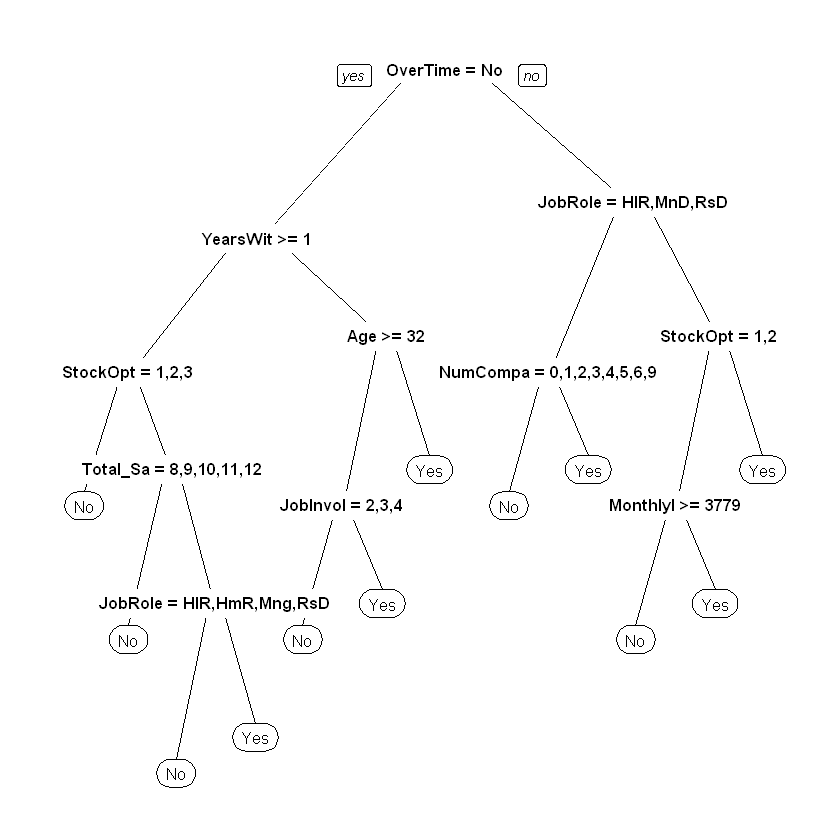

In [83]:
# Plot the tree 
tree <- rpart(Attrition ~ ., data = att_train_os, method = "class")
prp(tree)

In [84]:
# Predict the model And plot Confusion matrix

tree_pred <- predict(tree, att_test, type = 'class')
df_tree <- data.frame(tree_pred, att_test$Attrition)
colnames(df_tree) <- c('Predicted', 'Actual')
cm <- table(df_tree$Predicted, df_tree$Actual)
confusionMatrix(cm)

Confusion Matrix and Statistics

     
       No Yes
  No  190  19
  Yes  48  27
                                          
               Accuracy : 0.7641          
                 95% CI : (0.7103, 0.8122)
    No Information Rate : 0.838           
    P-Value [Acc > NIR] : 0.9995144       
                                          
                  Kappa : 0.3072          
                                          
 Mcnemar's Test P-Value : 0.0006245       
                                          
            Sensitivity : 0.7983          
            Specificity : 0.5870          
         Pos Pred Value : 0.9091          
         Neg Pred Value : 0.3600          
             Prevalence : 0.8380          
         Detection Rate : 0.6690          
   Detection Prevalence : 0.7359          
      Balanced Accuracy : 0.6926          
                                          
       'Positive' Class : No              
                                          

#### 3. Random Forest Classifier

In [ ]:
rf <- randomForest(Attrition ~., data=att_train_os)
rf

In [ ]:
rf_caret <- train(Attrition ~., data=att_train_os,
                 trControl = trainControl(method = 'repeatedcv', number = 7, repeats = 10, 
                                          search = 'random', verboseIter = T),
                 method='rf')
rf_caret